In [1]:
import orchest
import vaex as vx

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# get the data from the previous step
data = orchest.get_inputs()
data, target = data[0]

In [3]:
data, target = vx.from_pandas(data), vx.from_pandas(target)

In [4]:
data.head()

#,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41,6.98413,1.02381,322,2.55556,37.88,-122.23
1,8.3014,21,6.23814,0.97188,2401,2.10984,37.86,-122.22
2,7.2574,52,8.28814,1.07345,496,2.80226,37.85,-122.24
3,5.6431,52,5.81735,1.07306,558,2.54795,37.85,-122.25
4,3.8462,52,6.28185,1.08108,565,2.18147,37.85,-122.25
5,4.0368,52,4.76166,1.10363,413,2.1399,37.85,-122.25
6,3.6591,52,4.93191,0.951362,1094,2.1284,37.84,-122.25
7,3.12,52,4.79753,1.06182,1157,1.78825,37.84,-122.25
8,2.0804,42,4.29412,1.11765,1206,2.02689,37.84,-122.26
9,3.6912,52,4.97059,0.990196,1551,2.17227,37.84,-122.25


In [5]:
data.info()

In [6]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
dtype,float64,float64,float64,float64,float64,float64,float64,float64
count,20640,20640,20640,20640,20640,20640,20640,20640
NA,0,0,0,0,0,0,0,0
mean,3.8706710029070246,28.639486434108527,5.428999742190365,1.0966751496062053,1425.4767441860465,3.070655159436382,35.6318614341087,-119.56970445736148
std,1.89978,12.5853,2.47411,0.473899,1132.43,10.3858,2.1359,2.00348
min,0.4999,1,0.846154,0.333333,3,0.692308,32.54,-124.35
max,15.0001,52,141.909,34.0667,35682,1243.33,41.95,-114.31


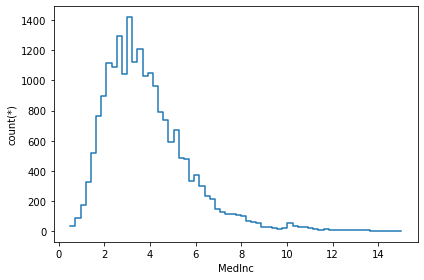

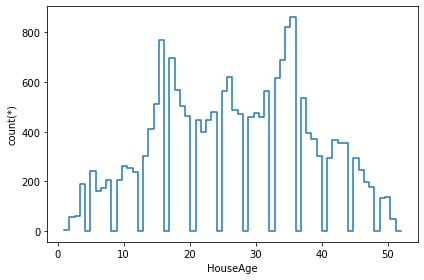

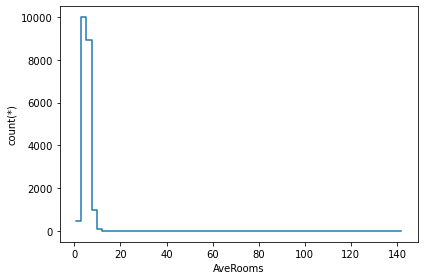

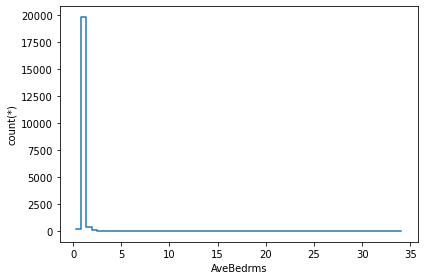

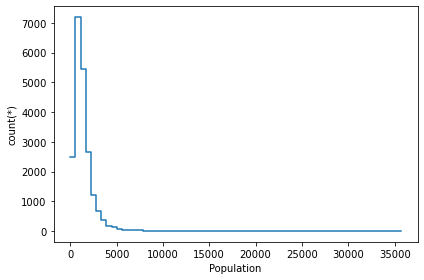

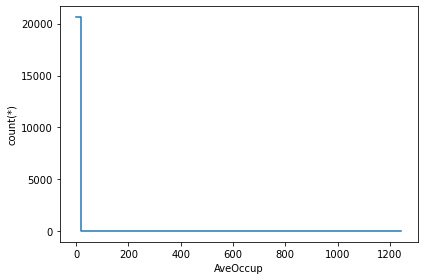

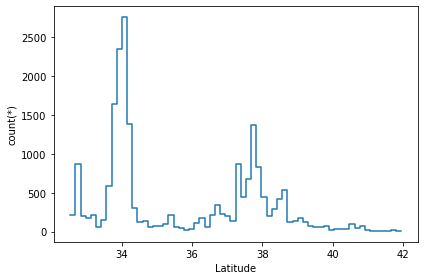

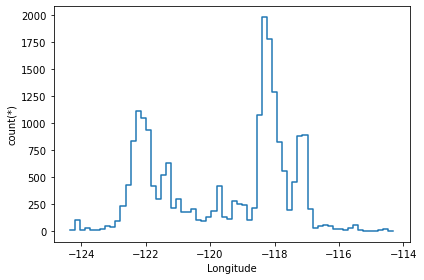

In [8]:
for col in data.columns.keys():
    data.plot1d(col, shape=(64))
    plt.show()

### PCA
Let's use PCA to reduce the number of features to two, then plot with respect to the target feature.


In [9]:
# first, scale the input features to properly use PCA
x = data.values
x = StandardScaler().fit_transform(x)
y = target.values

In [10]:
# run PCA over the features
pca = PCA(n_components=2)
components = pca.fit_transform(x)

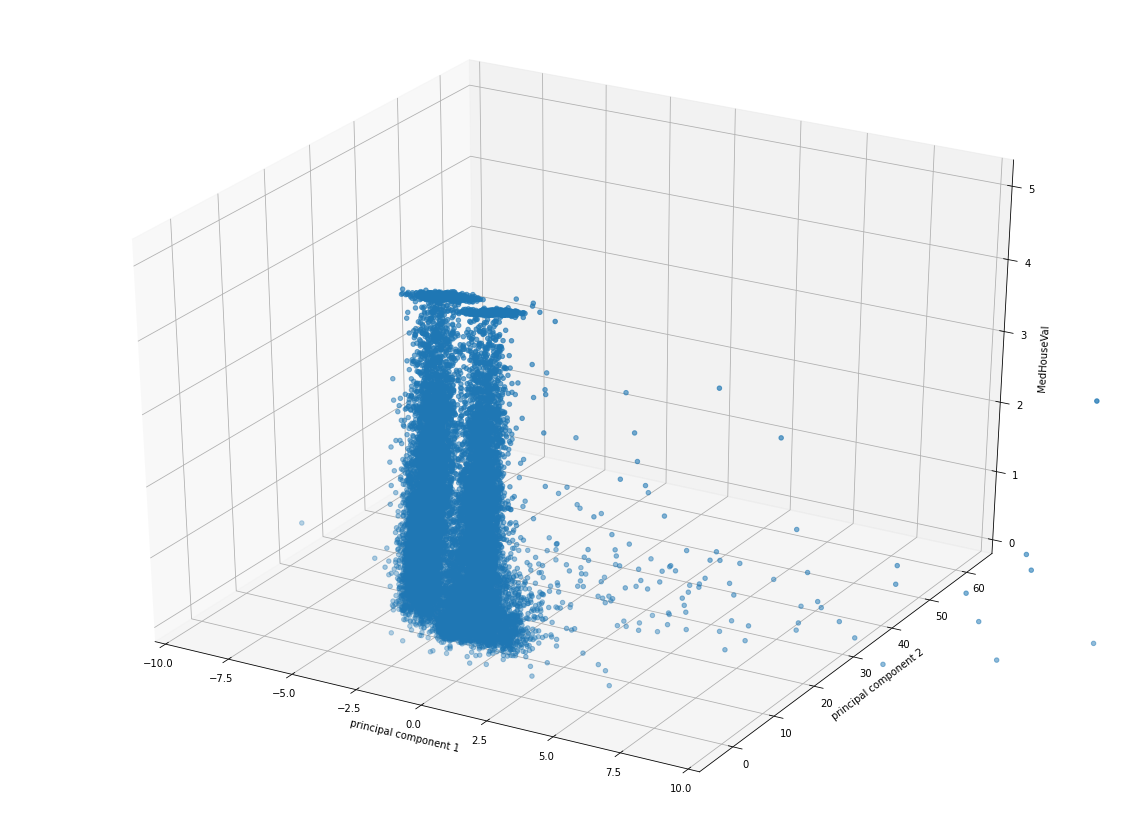

In [11]:
# plot the principal components vs the target feature
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], y)
ax.set_xlim([-10, 10])

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('MedHouseVal')

plt.show()